In [1]:
# Import
import matplotlib.pyplot as plt
import numpy as np

# GameAI
## Project 01 - Simple strategies for turn-based games

## ToDo

* 1.2 - Simple strategies for tic tac toe
 * 1.2.1 - Implement a probabilistic strategy
 * 1.2.2 - Implement a heuristic strategy
* 1.3 - Connect Four

## Task 1.2 - Simple strategies for tic tac toe

* Script -> Object oriented implementation
 * Play multiple games on one instance (`reset_game()`)
 * Collect data in the object

In [2]:
# Import and initiate TicTacToe
from tic_tac_toe_B import TicTacToe
tic_tac_toe = TicTacToe()

In [3]:
tic_tac_toe.play_a_game()

x moves
[[' ' ' ' ' ']
 ['x' ' ' ' ']
 [' ' ' ' ' ']]
o moves
[[' ' ' ' 'o']
 ['x' ' ' ' ']
 [' ' ' ' ' ']]
x moves
[[' ' 'x' 'o']
 ['x' ' ' ' ']
 [' ' ' ' ' ']]
o moves
[[' ' 'x' 'o']
 ['x' ' ' ' ']
 ['o' ' ' ' ']]
x moves
[[' ' 'x' 'o']
 ['x' ' ' ' ']
 ['o' ' ' 'x']]
o moves
[[' ' 'x' 'o']
 ['x' ' ' ' ']
 ['o' 'o' 'x']]
x moves
[[' ' 'x' 'o']
 ['x' ' ' 'x']
 ['o' 'o' 'x']]
o moves
[[' ' 'x' 'o']
 ['x' 'o' 'x']
 ['o' 'o' 'x']]
player o wins after 8 moves


-1

In [4]:
# Array containing count data
tic_tac_toe.S_stats

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [5]:
# Completely reset the data in the instance.
tic_tac_toe.reset_game(total_reset=True)

## 1.2.1 - Implement a probabilistic strategy

* Play at least 1000 games

* Count cell contribution to a win

* Normalize count data

* Make player X to 'use' the data

* Play at least 1000 games
* ...

In [6]:
tournament_results = tic_tac_toe.play_a_tournament(laps=10000, printing_modulo=5000)

=== Lap: 0 ===
'x'	1
'o'	0
DRAW	0
=== Lap: 5000 ===
'x'	2981
'o'	1396
DRAW	624
Tournament results in: 
'x'	5926
'o'	2800
DRAW	1274


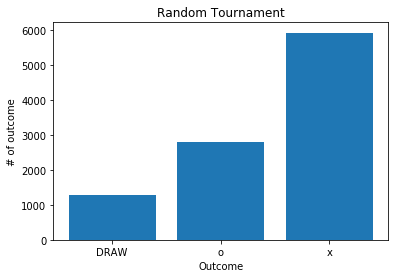

In [7]:
# Plot Barchart of wins and draws
tic_tac_toe.plot_bar(label="Random Tournament", statistics=tournament_results)

* ...

* Count cell contribution to a win

* Normalize count data

* ...

In [8]:
# Cell contribution to wins
tic_tac_toe.S_stats

array([[3487, 2065, 3513],
       [2059, 5026, 2118],
       [3444, 2055, 3536]])

In [9]:
# Normalize data and save to a JSON file
tic_tac_toe.normalize_statistics(print_normalization=True)

Field	Normalized value
0	0.1277149031241988
1	0.07563271435373402
2	0.12866717943083178
3	0.07541295828297256
4	0.18408233527451195
5	0.07757389297879354
6	0.12613998461707504
7	0.07526645423579827
8	0.12950957770208402


* ...

* Make player X to 'use' the data

In [10]:
# Play a non random tournament (using determined statistics)
prob_stats = tic_tac_toe.play_a_tournament(laps=10000, printing_modulo=5000, random=False, x_player_method='p')

=== Lap: 0 ===
'x'	0
'o'	1
DRAW	0
=== Lap: 5000 ===
'x'	4300
'o'	464
DRAW	237
Tournament results in: 
'x'	8588
'o'	941
DRAW	471


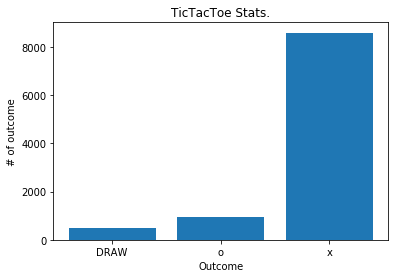

In [11]:
# Plot Barchart of wins and draws
tic_tac_toe.plot_bar(statistics=prob_stats)

## 1.2.2 - Implement a heuristic strategy

* Evaluate quality of potential move
* Make player X to follow that strategy

* Evaluate quality of potential move
 * Consider all free positions
 * Select most auspicious one

1. Can I win?
 1. Yes: Put the mark here
 2. No: Continue with 2
  
2. Can oponent win?
 1. Yes: Put the mark here
 2. No: Continue with 3
 
3. Apply probabilistic strategy

In [12]:
# Play a non random tournament (using evaluation of free field)
heu_stats = tic_tac_toe.play_a_tournament(laps=10000, printing_modulo=5000, random=False, x_player_method="h")

=== Lap: 0 ===
'x'	1
'o'	0
DRAW	0
=== Lap: 5000 ===
'x'	4835
'o'	0
DRAW	166
Tournament results in: 
'x'	9644
'o'	0
DRAW	356


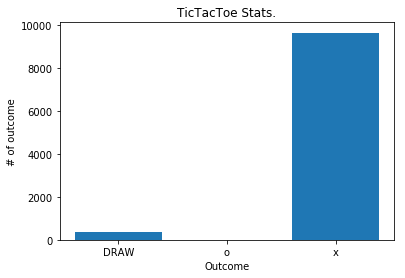

In [13]:
# Plot Barchart of wins and draws
tic_tac_toe.plot_bar(statistics=heu_stats)

## Task 1.3 - Connect Four

* Implement basic mechanics
 * Random moves
 * Termination tests
* Play a tournament
 * Try to collect statistics about 'good moves'
* Realize a "beautiful" GUI
 * Observe game progress
 * Possible user input

### Termination tests
![Token_inserted](project_01/Token_base.png)

![count_right](project_01/Token_right.png)

![count_left](project_01/Token_left.png)

![count_down](project_01/Token_down.png)

![all_directions](project_01/Token_all.png)

```python 
Count_Array = [1, 3, 3, ..., 4]
```

In [14]:
# Import and initiate Connect4
from connect_four import ConnectFour
import matplotlib.pyplot as plt
connect_four = ConnectFour()

In [15]:
# Play a tournament of ConnectFour
tournament_results = connect_four.play_a_tournament(laps=10000, modulo=5000)

=== Lap: 0 ===
'Y'	0
'R'	1
DRAW	0
=== Lap: 5000 ===
'Y'	2771
'R'	2214
DRAW	16
Tournament results in: 
'Y'	5560
'R'	4410
DRAW	30


### Collecting statistics about 'good moves'

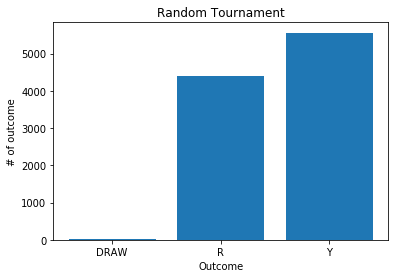

In [16]:
# 10k game tournament results
connect_four.plot_bar(label="Random Tournament", statistics=tournament_results)

In [17]:
# Get the top moves for the 1st, 2nd and 3rd move of winning player

d = [{}, {}, {}, {}]

number_of_total_wins = len(connect_four.stats['win_moves'])

for moveset in connect_four.stats['win_moves']:
    for index, move in enumerate(moveset[:4]):
        if move in d[index]:
            d[index][move] += 1
        else:
            d[index][move] = 1

In [18]:
# Helping function to plot the bars
def plot_bars(data_dict, label="Bars", xlabel="Column", ylabel="# of set tokens"):
    """Helper to plot bars for 1st move distribution
    
    :param data_dict: Data dict that contains data to plot.
    """
    x = []
    y = []

    for key, value in data_dict.items():
        x.append(key)
        y.append(value)

    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(label)
    plt.show()

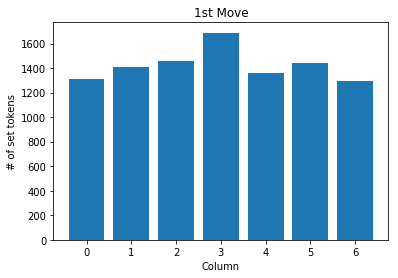

In [19]:
# Using helperfunction to plot
plot_bars(d[0], "1st Move")

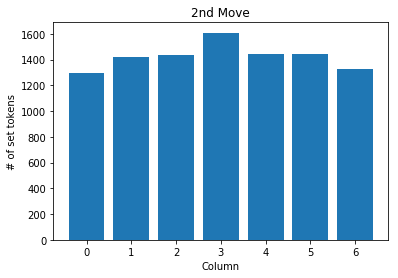

In [20]:
# Using helperfunction to plot
plot_bars(d[1], "2nd Move")

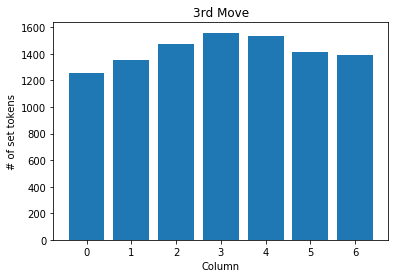

In [21]:
# Using helperfunction to plot
plot_bars(d[2], "3rd Move")

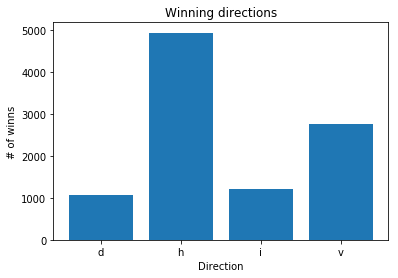

In [22]:
# Using helperfunction to plot
plot_bars(connect_four.stats['win_direction'], "Winning directions", "Direction", "# of winns")

### Finding 'good moves'

* Tried to determine good 1st move

* Horizontal patterns seem to be a good 'goal'

* Not trivial to define what a good move is

* Number of possible field configurations is high
 * If a move is good depends on this configuration

## Graphical User Interface

In [ ]:
!python connect_four.py